# <u>Chapter 3: Introduction to your Kepler science lightcurve</u>

<div class="alert alert-block alert-info">

### This Notebook will give you the tools to:

- open Kepler science lighcurves
- understand data structure in fits files
- understand basic features of data
- start with fitting your dataset

### What you should achieve:

- plot and inspect data
- identify transits
- make a plan for modelling

### What's next:
after you have completed this notebook:

- perform detailed modelling of your data
- write up the summary of your modelling
- collect your results for the comparison with other datasets
    
### Table of contents:
    
- [1. Reading Kepler data](#sec:keplerdata)
- [2. Step by step guide to your data](#sec:dataguide)
- [Summary](#sec:summary)

<div class="alert alert-block alert-warning">
    
<b>Make sure to edit the box below to match your assigned object number.</b>

In [2]:
#Necessary imports
from astropy.io import fits #used to open fits files in which data are stored
import matplotlib.pyplot as plt #plotting
import glob
import numpy as np
#add here the source number assigned to you, '1' (Team Osiris) or '2' (Team Dagon)
#Check Moodle to see which object has been assigned to you
mykepler = '1' 

<a id="sec:keplerdata"></a>
## 1. Reading Kepler data

First, we will have a look at the dataset, we have given you the fits dataset exactly as provided by Kepler, you can download additional datasets [on the Kepler archive](https://archive.stsci.edu/kepler/). We have though made the header anonymous so you cannot see which source you are working with. 

In [3]:
#Fits files are open like this:
lc = fits.open('Data/Object%slc/kplr%s_1.fits'%(mykepler, mykepler))

Fits files are common in astrophysics, they have different extensions, which can be images or tables. The information discribing the data is stored in the header.

In [4]:
lc

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f8cf817fa00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8cce99c7c0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f8cce04aca0>]

In [5]:
#The header for the first extension can be accesses like this:
lc[0].header
#It contains basic information about the object (some of those removed here)

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-09'         / file creation date.                            
CREATOR = '826630 FluxExporter2PipelineModule' / pipeline job and program used t
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.22 r60269' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

**You will see some of the header keywords to read 'None of your business', this is because we have anonymized the dataset for you. 

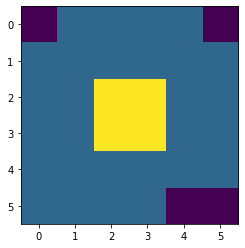

In [6]:
#The last extension holds a small image of the source:
plt.imshow(lc[2].data)

In [7]:
#It also has a header that gives more information
lc[2].header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    6 / length of first array dimension                
NAXIS2  =                    6 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'APERTURE'           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
TELESCOP= 'Kepler  '           / telescope                                      
INSTRUME= 'Kepler Photometer'  / detector type                                  
OBJECT  = 'None of your busi

In [8]:
#lets have a look at the second extension
lc[1]
#This is a table extension

In [9]:
#Here the beginning has a description of columns in the table, including the units
lc[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 4370 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

This is our lightcirve extension. You will notice two lighcurves here. "SAP_FLUX" is the Simple Aperture Photometry, whereas "PDCSAP_FLUX" is Pre-search Data Condictioned, i.e. has had processing applied for calibration. 

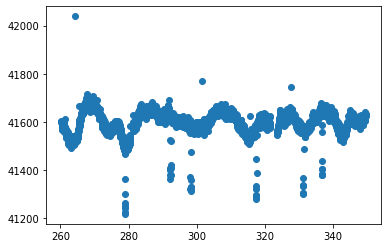

In [10]:
#Lets plot the lightcurve, you can plot the time and flux:
plt.plot(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], ls='None', marker='o')
#This plots the barycentre time and flux in e/s

<ErrorbarContainer object of 3 artists>

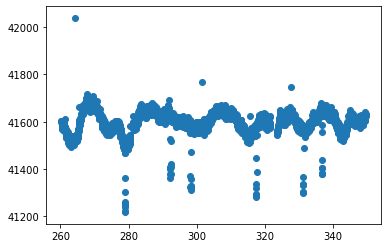

In [11]:
#Measurements errors are also included, you can plot them as follows
plt.errorbar(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], lc[1].data['PDCSAP_FLUX_ERR'], ls='None', marker='o')
#We'll need to zoom in to see them:

<a id="sec:dataguide"></a>
## 2. Step by step guide to your data

#### Do not panic (or maybe do), what you have seen so far is only a small subset of the data you will be working with.

<div class="alert alert-block alert-success">
    
### Your turn: First look at data - signal-to-noise

- calculate the signal to noise of your lightcurve. Compare it to the signal-to-noise you required to detect a trsnait in Chapter 1. You can also compare it to some of the aperture photometry in Chapter 2.

In [12]:
sn = np.nanmean(lc[1].data['PDCSAP_FLUX']/lc[1].data['PDCSAP_FLUX_ERR'])
print (sn)

5684.182


In [13]:
sn_alt= np.nanmedian(lc[1].data['PDCSAP_FLUX']/lc[1].data['PDCSAP_FLUX_ERR'])
print(sn)

5684.182


<div class="alert alert-block alert-success">
    
### Your turn: First look at data - What does your lightcurve look like?

Make notes about your lightcurve: you will be fitting this for planets, do you see any complications?

(260.0, 350.0)

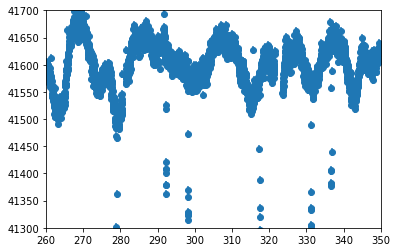

In [14]:
plt.errorbar(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], lc[1].data['PDCSAP_FLUX_ERR'], ls='None', marker='o')
plt.ylim(41300,41700)
plt.xlim(260,350)

(260.0, 350.0)

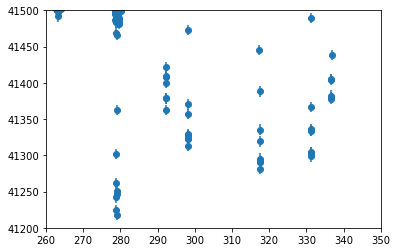

In [15]:
plt.errorbar(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], lc[1].data['PDCSAP_FLUX_ERR'], ls='None', marker='o')
plt.ylim(41200,41500)
plt.xlim(260,350)

(260.0, 350.0)

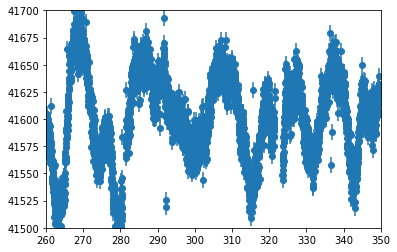

In [16]:
plt.errorbar(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], lc[1].data['PDCSAP_FLUX_ERR'], ls='None', marker='o')
plt.ylim(41500,41700)
plt.xlim(260,350)

(310.0, 320.0)

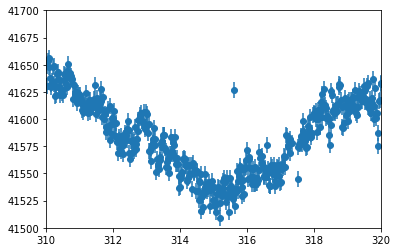

In [17]:
plt.errorbar(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], lc[1].data['PDCSAP_FLUX_ERR'], ls='None', marker='o')
plt.ylim(41500,41700)
plt.xlim(310,320)

no obvious normalisation/constant level for star flux,
some transits very 'thin'

<div class="alert alert-block alert-success">
    
### Your turn: Preparing for fitting:

Locate all transits and make a plot for each

In [18]:
## So far, we have only looked at a subset of the data, the full dataset is stored in the Data folder.
glob.glob('Data/Object%slc/kplr*.fits'%(mykepler)) #Lists all your lightcurve files

['Data/Object1lc/kplr1_17.fits',
 'Data/Object1lc/kplr1_15.fits',
 'Data/Object1lc/kplr1_16.fits',
 'Data/Object1lc/kplr1_14.fits',
 'Data/Object1lc/kplr1_13.fits',
 'Data/Object1lc/kplr1_12.fits',
 'Data/Object1lc/kplr1_11.fits',
 'Data/Object1lc/kplr1_10.fits',
 'Data/Object1lc/kplr1_9.fits',
 'Data/Object1lc/kplr1_8.fits',
 'Data/Object1lc/kplr1_7.fits',
 'Data/Object1lc/kplr1_6.fits',
 'Data/Object1lc/kplr1_5.fits',
 'Data/Object1lc/kplr1_4.fits',
 'Data/Object1lc/kplr1_3.fits',
 'Data/Object1lc/kplr1_2.fits',
 'Data/Object1lc/kplr1_1.fits']

<div class="alert alert-block alert-success">

### Your turn: plot the full lightcurve

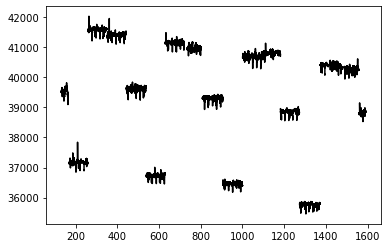

In [19]:
#THis works....
for lcfile in glob.glob('Data/Object%slc/kplr*.fits' %(mykepler)):
    tmp = fits.open(lcfile)
    tmptime = (tmp[1].data['TIME'])
    tmpflux = (tmp[1].data['PDCSAP_FLUX'])
    tmperror = (tmp[1].data['PDCSAP_FLUX_ERR'])
    plt.plot(tmptime, tmpflux, c='k')

<div class="alert alert-block alert-success">

### Your turn: Planning for modelling - Make a plan

- Make a plan for modelling your lightcurve
- Which steps will you need to take? In what order? What tools will you need?
- It might be good to combine all your data into a single file.

In [66]:
from scipy.signal import savgol_filter

lc1_flux = lc[1].data['PDCSAP_FLUX'][~np.isnan(lc[1].data['PDCSAP_FLUX'])]
interp_savgol = savgol_filter( lc1_flux, window_length=201,polyorder=3)
print (len( lc1_flux))
#windowlength is the length of the window over which the polynomial will be fit, polyorder is the order of the polynimial to be fit

4134


In [67]:
time1= lc[1].data['TIME'][~np.isnan(lc[1].data['PDCSAP_FLUX'])] #array[array of true false]- return array true values OR np.isfinite[array] true if number
print(len(time1)) #checking same length
error1 = lc[1].data['PDCSAP_FLUX_ERR'][~np.isnan(lc[1].data['PDCSAP_FLUX'])]

4134


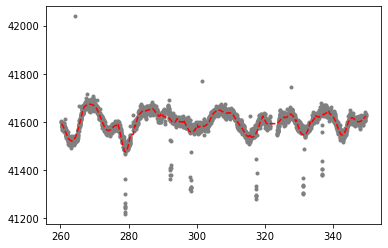

In [68]:
plt.plot(time1, lc1_flux, ls='None', marker='.', c='grey', label='Data')
plt.plot(time1, interp_savgol, ls='--', c='r', label='Savitzky Golay w=11,o=3')

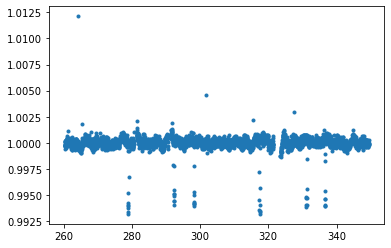

In [23]:
plt.plot(time1, lc1_flux/interp_savgol, ls ='none', marker = 'o', markersize =3)

(0.9925, 1.0025)

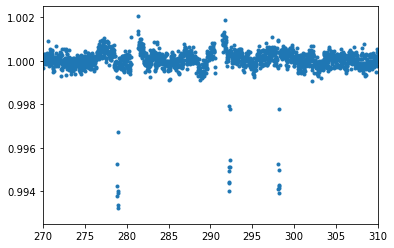

In [24]:
plt.plot(time1, lc1_flux/interp_savgol, ls ='none', marker = 'o', markersize =3)
plt.xlim(270,310)
plt.ylim(0.9925,1.0025)

(0.9925, 1.0)

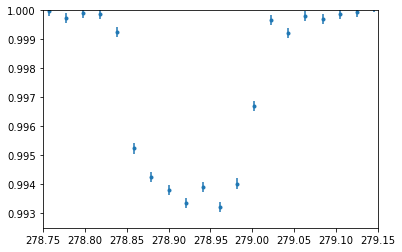

In [25]:
plt.errorbar(time1, lc1_flux/interp_savgol, yerr= error1/interp_savgol, ls ='none', marker = 'o', markersize =3)
plt.xlim(278.75,279.15)
plt.ylim(0.9925,1.000)

In [26]:
def strip_nan(flux, time, err):
    
    """
    function to get rid of all nan values and corresponding values for flux, flux error and time
    returns new arrays without nans
    """
    newflux = flux[~np.isnan(flux)]
    newtime = time[~np.isnan(flux)] 
    newerr = err[~np.isnan(flux)]
    
    return newflux, newtime, newerr
                           

In [29]:
#interp_savgol = savgol_filter( flux2, window_length=201,polyorder=3)
#plt.plot(time2, flux2, ls='None', marker='.', c='grey', label='Data')
#plt.plot(time2, interp_savgol, ls='--', c='r', label='Savitzky Golay w=11,o=3')

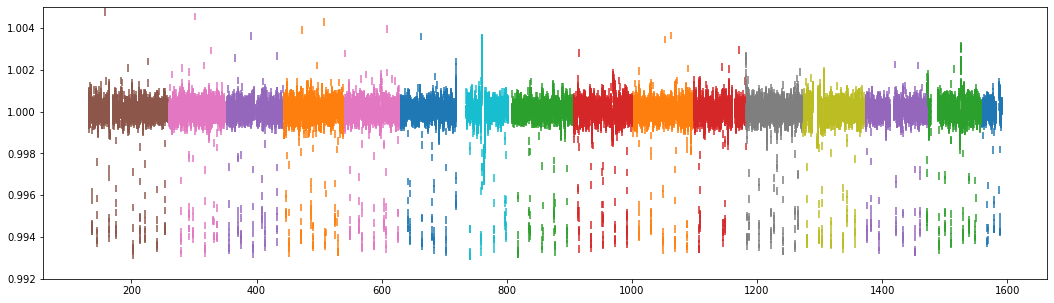

In [46]:
plt.figure(figsize=(18,5))
for lcfile in glob.glob('Data/Object%slc/kplr*.fits' %(mykepler)):
    tmp = fits.open(lcfile)
    flux, time, err = strip_nan(tmp[1].data['PDCSAP_FLUX'],tmp[1].data['TIME'],tmp[1].data['PDCSAP_FLUX_ERR'])
    interp_savgol = savgol_filter( flux, window_length=301,polyorder=3)
    plt.errorbar(time, flux/interp_savgol, yerr = err/interp_savgol, ls ='None')
    plt.ylim(0.992,1.005)

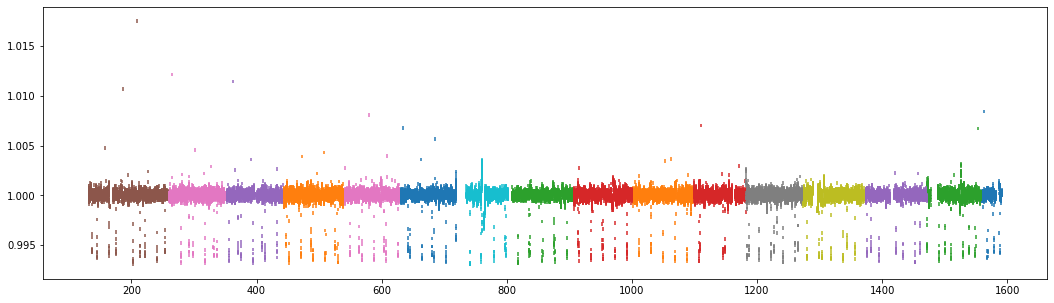

In [100]:
yneg= (flux <0)
normflux=[]
normtime=[]
normerr=[]

plt.figure(figsize=(18,5))
for lcfile in glob.glob('Data/Object%slc/kplr*.fits' %(mykepler)):
    tmp = fits.open(lcfile)
    flux, time, err = strip_nan(tmp[1].data['PDCSAP_FLUX'],tmp[1].data['TIME'],tmp[1].data['PDCSAP_FLUX_ERR'])
    interp_savgol = savgol_filter(flux, window_length=301,polyorder=3)
    normflux.extend(flux/interp_savgol)
    normtime.extend(time)
    normerr.extend(err/interp_savgol)
    plt.errorbar(time, flux/interp_savgol, yerr = err/interp_savgol, ls ='None')
    
    

In [101]:
#writing normalised lightcurve into file
np.savetxt('normalised_curve',np.array([normtime,normflux,normerr]).transpose(), delimiter =',')

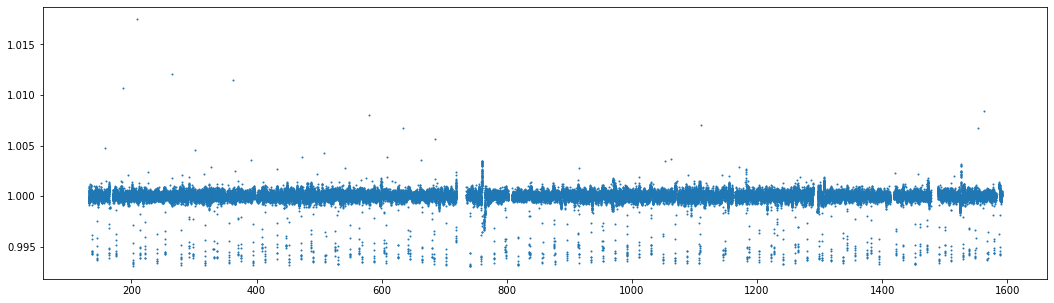

In [129]:
curve= np.loadtxt('normalised_curve', delimiter=',')
plt.figure(figsize=(18,5))
plt.plot(curve[:,0],curve[:,1], ls='None',marker ='o', markersize=1)

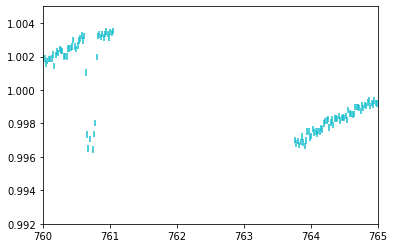

In [69]:

for lcfile in glob.glob('Data/Object%slc/kplr*.fits' %(mykepler)):
    tmp = fits.open(lcfile)
    flux, time, err = strip_nan(tmp[1].data['PDCSAP_FLUX'],tmp[1].data['TIME'],tmp[1].data['PDCSAP_FLUX_ERR'])
    interp_savgol = savgol_filter( flux, window_length=301,polyorder=3)
    plt.errorbar(time, flux/interp_savgol, yerr = err/interp_savgol, ls ='None')
    plt.ylim(0.992,1.005)
    plt.xlim(760,765)
    
    #m = ~((time> 764) & (time < 761 ))
    #tnew = np.arange(761,764,0.01)
    #newfl_sp = interpolate.BSpline(time[m], flux[m], 2, extrapolate=True)
    #plt.plot(tnew, newfl_sp(tnew), ls='--', c='r', label='Spline')

In [109]:
print(curve)

[[1.55924666e+03 9.99457489e-01 1.82373437e-04]
 [1.55926709e+03 9.99374107e-01 1.82495786e-04]
 [1.55928753e+03 9.99782862e-01 1.82410097e-04]
 ...
 [3.49454185e+02 9.99889045e-01 1.77195455e-04]
 [3.49474618e+02 1.00000001e+00 1.77210216e-04]
 [3.49495051e+02 9.99914797e-01 1.77227910e-04]]


In [148]:
#periodicities
print(curve[:,0][1] - curve[:,0][0])
print(curve[:,0].max() - curve[:,0].min())

0.02043445350136608
1459.4889253086512


In [144]:
print(curve[:,0].min()+1)
print(curve[:,0].min())

132.51301296925521
131.51301296925521


In [149]:
freqs = np.linspace((1/1459.5),(1/0.021), 1000) #1/longest, 1/shortest
import scipy.signal
from scipy.signal import lombscargle
lomb = scipy.signal.lombscargle(curve[:,0], curve[:,1], freqs, precenter=True)

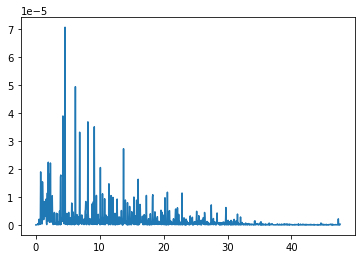

In [150]:
plt.plot(freqs, lomb) #x=freq y=power

In [151]:
period =np.linspace(1,35,10000)
lomb2 = scipy.signal.lombscargle(freqs, lomb, period, precenter=True)

19.246224622462247

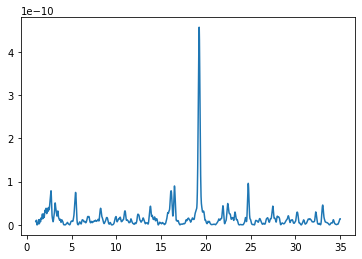

In [152]:
plt.plot(period, lomb2)
period[np.argmax(lomb2)]

In [124]:
import pandas as pd
def fold_lightcurve(time, flux, error, period):
    """
    Folds the lightcurve given a period.
    time: input time (same unit as period)
    flux: input flux
    error: input error
    period: period to be folded to, needs to same unit as time (i.e. days)
    returns: phase, folded flux, folded error
    """
    #Create a pandats dataframe from the 
    data = pd.DataFrame({'time': time, 'flux': flux, 'error': error})
    
    #create the phase 
    data['phase'] = data.apply(lambda x: ((x.time/ period) - np.floor(x.time / period)), axis=1)
    
    #Creates the out phase, flux and error
    phase_long = np.concatenate((data['phase'], data['phase'] + 1.0, data['phase'] + 2.0))
    flux_long = np.concatenate((flux, flux, flux))
    err_long = np.concatenate((error, error, error))
    
    return(phase_long, flux_long, err_long)

Text(0, 0.5, 'Flux')

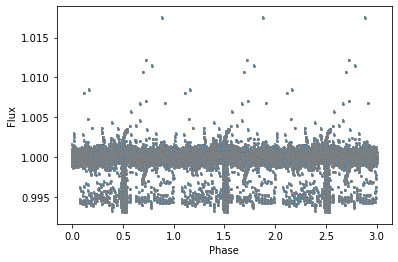

In [153]:
p, p_flux,p_error = fold_lightcurve(curve[:,0], curve[:,1], curve[:,2], 19.246224622462247)
plt.errorbar(p, p_flux, yerr=p_error, marker='o', markersize=2, ls='None', zorder=4, label='_nolegend_', mec='Grey')
plt.xlabel('Phase')
plt.ylabel('Flux')

<a id="sec:summary"></a>
<div class="alert alert-block alert-info">

## Summary:

After completing this notebook, you should have:

- identified and inspected some individual transits
- made a plan for modelling your data